# Importing Necessary Libraries

In [15]:
from pyspark.sql import SparkSession
import cv2
import numpy as np
import io, os, subprocess
import matplotlib.pyplot as plt


# Initialize Spark Session
### Initialize Spark session

In [16]:
spark = SparkSession.builder \
    .appName("ImageProcessing") \
    .getOrCreate()

PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.

# List Videos in HDFS Directory

In [ ]:
def list_files_in_hdfs(directory):
    proc = subprocess.Popen(['hdfs', 'dfs', '-ls', directory], stdout=subprocess.PIPE)
    output = proc.communicate()[0].decode('utf-8')  # Decode bytes to string
    files = []
    for line in output.split('\n'):
        parts = line.split()
        if len(parts) > 7:
            files.append(parts[7])
    return files

In [ ]:
video_files = list_files_in_hdfs('/student_videos')
print(video_files)

['/student_videos/video-32a7c9e2-13b5-485f-ab19-d8c07081cb35.mp4', '/student_videos/video-624df084-19a3-4bbf-8fe4-ba1f0d1c09d6.mp4', '/student_videos/video-68108ec1-7cf0-4bc0-b843-958c33234597.mp4', '/student_videos/video-76e4d3a2-82d2-4679-b6d2-75ac5004484c.mp4', '/student_videos/video-f2c1c7c6-455c-4a43-8a2b-4a74065c18a3.mp4']


# Download Video from HDFS

In [ ]:
def download_videos_from_hdfs(hdfs_files, local_dir):
    """
    Download video files from HDFS to the local directory, only if they don't already exist.
    :param hdfs_files: List of HDFS file paths.
    :param local_dir: Local directory to store the videos.
    """
    if not os.path.exists(local_dir):
        os.makedirs(local_dir)

    for hdfs_file in hdfs_files:
        local_file = os.path.join(local_dir, os.path.basename(hdfs_file))
        if not os.path.exists(local_file):
            print(f"Downloading {hdfs_file} to {local_file}")
            subprocess.run(['hdfs', 'dfs', '-get', hdfs_file, local_file], check=True)
        else:
            print(f"File {local_file} already exists. Skipping download.")

# Extract Frames from Videos

In [ ]:
def extract_frames(video_path, num_frames):
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    step = total_frames // num_frames
    
    for i in range(num_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * step)
        ret, frame = cap.read()
        if ret:
            frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    cap.release()
    return frames

In [ ]:
download_videos_from_hdfs(video_files, 'videos')

# Read content in the videos directory

In [ ]:
def read_videos_from_dir(directory):
    videos = []
    for file in os.listdir(directory):
        if file.endswith(".mp4"):
            videos.append(os.path.join(directory, file))
    return videos

videos = read_videos_from_dir('videos')
print(videos)

['videos/video-624df084-19a3-4bbf-8fe4-ba1f0d1c09d6.mp4', 'videos/video-f2c1c7c6-455c-4a43-8a2b-4a74065c18a3.mp4', 'videos/video-32a7c9e2-13b5-485f-ab19-d8c07081cb35.mp4', 'videos/video-68108ec1-7cf0-4bc0-b843-958c33234597.mp4', 'videos/video-76e4d3a2-82d2-4679-b6d2-75ac5004484c.mp4']


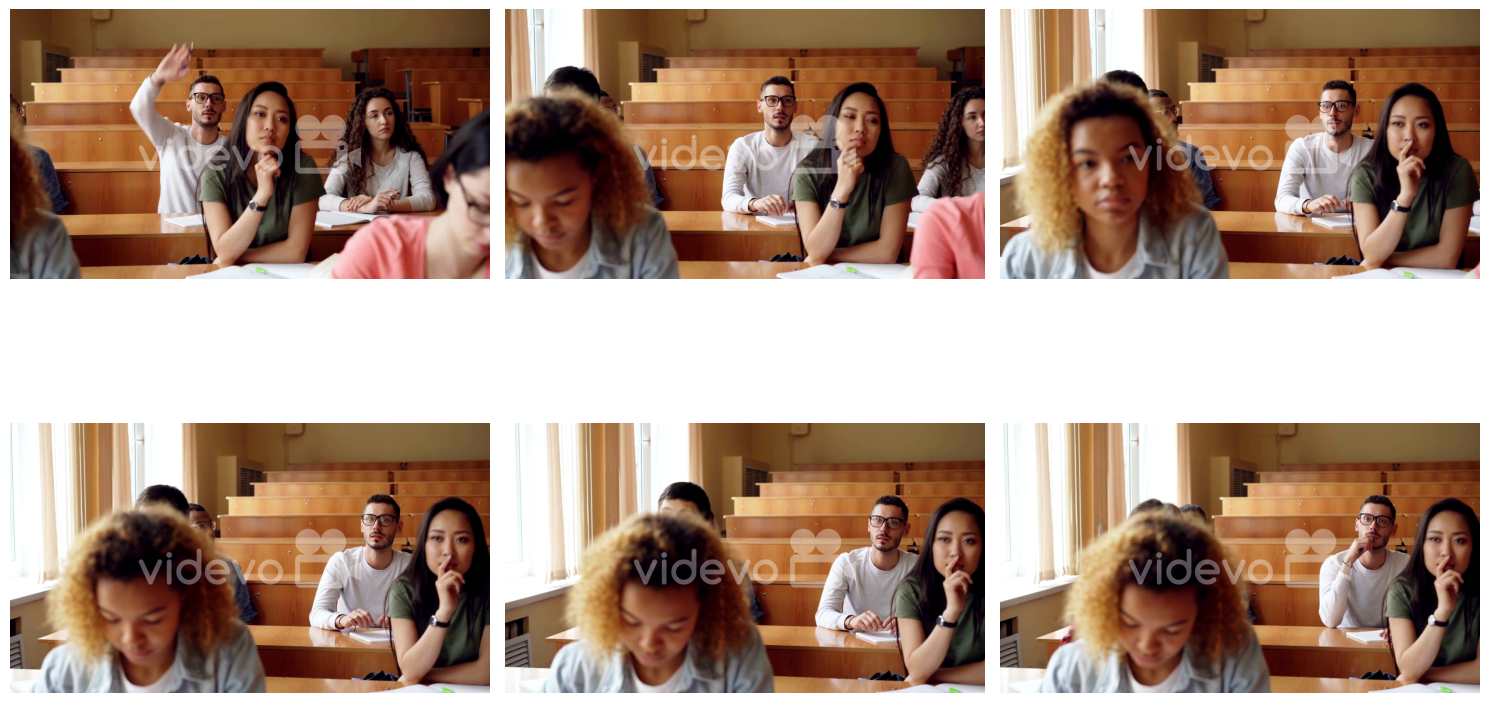

In [ ]:
frames = extract_frames(videos[0], 6)

# Plotting the frames
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axes.flatten()):
    if i < len(frames):
        ax.imshow(frames[i])
    ax.axis('off')
plt.tight_layout()
plt.show()